<a href="https://colab.research.google.com/github/nick18-ni/Aula-de-Visao-Computscional/blob/main/Girar_pagina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract

Ângulo detectado: 270 graus
1600
1204


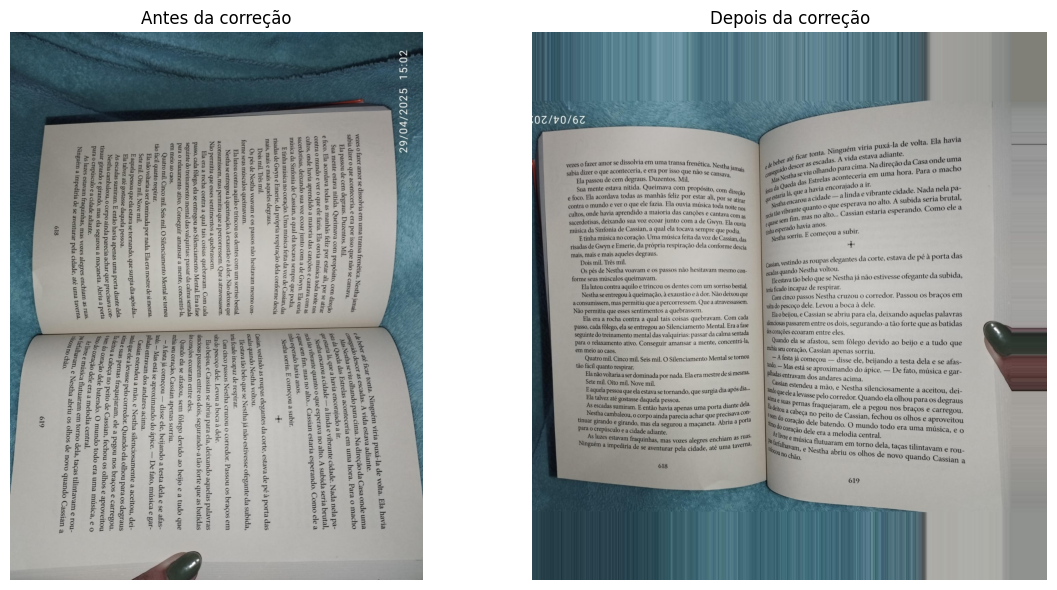

In [ ]:
import cv2                      # OpenCV para processamento de imagens
import pytesseract              # pytesseract para OCR e detecção de rotação
from pytesseract import Output # Para acessar o resultado como dicionário
import numpy as np              # NumPy é usado para manipulação de matrizes
import matplotlib.pyplot as plt # Para exibir as imagens com matplotlib

# Lê a imagem do disco (substitua pelo caminho correto da sua imagem)
imagem = cv2.imread("pag1.jpeg")

# Converte a imagem de BGR (formato padrão do OpenCV) para escala de cinza
# Isso melhora o desempenho do OCR e evita erros de detecção
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Utiliza o Tesseract para extrair dados de orientação da imagem
# O parâmetro output_type=Output.DICT retorna os dados como dicionário
# page_num, orientation, rotate, orientation_conf, script, script_conf
osd = pytesseract.image_to_osd(cinza, output_type=Output.DICT)

# Extrai o ângulo de rotação detectado
# O valor é geralmente 0, 90, 180 ou 270 dependendo da orientação do texto
angulo = osd["rotate"]

# Exibe o ângulo no terminal para conferência
print(f"Ângulo detectado: {angulo} graus")

# Obtém as dimensões da imagem original
(h, w) = imagem.shape[:2]
print(h)
print(w)
# Define o centro da imagem (necessário para a matriz de rotação)
centro = (w // 2, h // 2)

# Cria uma matriz de rotação 2D com base no ângulo detectado (em sentido oposto)
# Parâmetros:
# centro: ponto em torno do qual a rotação será feita
# -angulo: o sinal negativo corrige a rotação
# 1.0: fator de escala (mantém o mesmo tamanho da imagem)
matriz_rotacao = cv2.getRotationMatrix2D(centro, -angulo, 1.0)


# Aplica a matriz de rotação à imagem original usando warpAffine
# Isso "gira" a imagem para corrigir a inclinação do texto
# Parâmetros:
# - imagem: imagem de entrada
# - matriz_rotacao: a matriz calculada anteriormente
# - (w+300, h): tamanho da imagem de saída, aumenta 300 no número de colunas de pixels, e mantem a altura
# - flags=cv2.INTER_CUBIC: método de interpolação para boa qualidade
# - borderMode=cv2.BORDER_REPLICATE: replica bordas para evitar áreas pretas
imagem_corrigida = cv2.warpAffine(imagem, matriz_rotacao, (w+300,h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Cria uma figura com dois subplots (antes e depois)
plt.figure(figsize=(12, 6))

# Mostra a imagem original (antes da correção)
plt.subplot(1, 2, 1)
plt.title("Antes da correção")
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))  # Converte BGR para RGB para exibição correta
plt.axis("off")  # Remove os eixos para visualização limpa

# Mostra a imagem corrigida (após a rotação)
plt.subplot(1, 2, 2)
plt.title("Depois da correção")
plt.imshow(cv2.cvtColor(imagem_corrigida, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Ajusta os espaçamentos e exibe o resultado
plt.tight_layout()
plt.show()


Ângulo detectado: 90 graus


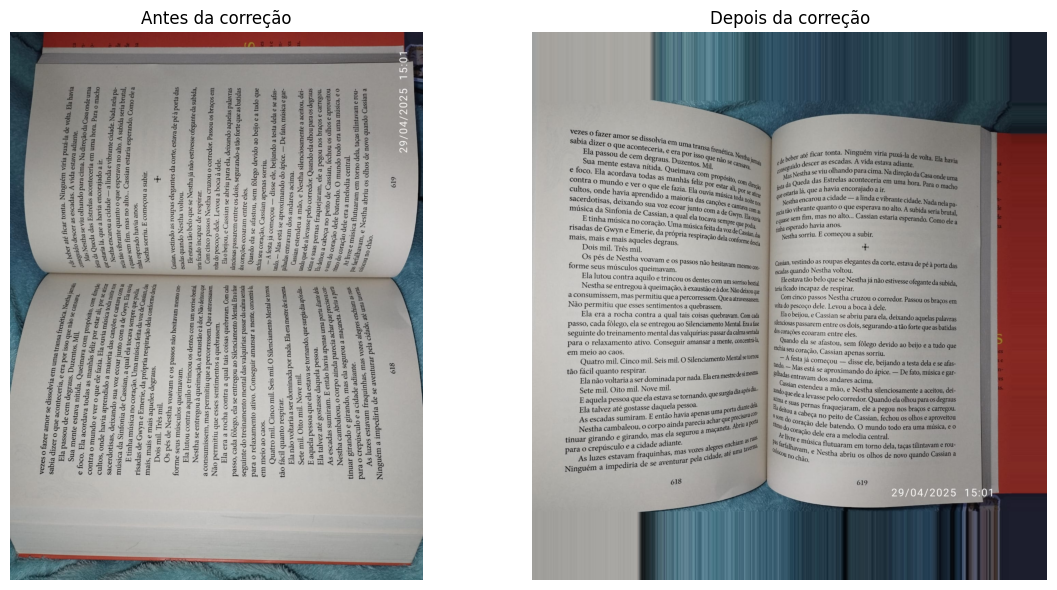

In [ ]:
import cv2                      # OpenCV para processamento de imagens
import pytesseract              # pytesseract para OCR e detecção de rotação
from pytesseract import Output # Para acessar o resultado como dicionário
import numpy as np              # NumPy é usado para manipulação de matrizes
import matplotlib.pyplot as plt # Para exibir as imagens com matplotlib

# Lê a imagem do disco (substitua pelo caminho correto da sua imagem)
imagem = cv2.imread("pag2.jpeg")

# Converte a imagem de BGR (formato padrão do OpenCV) para escala de cinza
# Isso melhora o desempenho do OCR e evita erros de detecção
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Utiliza o Tesseract para extrair dados de orientação da imagem
# O parâmetro output_type=Output.DICT retorna os dados como dicionário
# page_num, orientation, rotate, orientation_conf, script, script_conf
# detecta orientação de "layout de página" — ou seja, se a página precisa ser girada em 90, 180 ou 270.
osd = pytesseract.image_to_osd(cinza, output_type=Output.DICT)

# Extrai o ângulo de rotação detectado
# O valor é geralmente 0, 90, 180 ou 270 dependendo da orientação do texto
angulo = osd["rotate"]

# Exibe o ângulo no terminal para conferência
print(f"Ângulo detectado: {angulo} graus")

# Obtém as dimensões da imagem original
(h, w) = imagem.shape[:2]

# Define o centro da imagem (necessário para a matriz de rotação)
centro = (w // 2, h // 2)

# Cria uma matriz de rotação 2D com base no ângulo detectado (em sentido oposto)
# Parâmetros:
# centro: ponto em torno do qual a rotação será feita
# -angulo: o sinal negativo corrige a rotação
# 1.0: fator de escala (mantém o mesmo tamanho da imagem)
matriz_rotacao = cv2.getRotationMatrix2D(centro, -angulo, 1.0)


# Aplica a matriz de rotação à imagem original usando warpAffine
# Isso "gira" a imagem para corrigir a inclinação do texto
# Parâmetros:
# - imagem: imagem de entrada
# - matriz_rotacao: a matriz calculada anteriormente
# - (w+300, h): tamanho da imagem de saída, almenta 300 no número de colunas de pixels, e mantem a altura
# - flags=cv2.INTER_CUBIC: método de interpolação para boa qualidade
# - borderMode=cv2.BORDER_REPLICATE: replica bordas para evitar áreas pretas
imagem_corrigida = cv2.warpAffine(imagem, matriz_rotacao, (w+300, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Cria uma figura com dois subplots (antes e depois)
plt.figure(figsize=(12, 6))

# Mostra a imagem original (antes da correção)
plt.subplot(1, 2, 1)
plt.title("Antes da correção")
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))  # Converte BGR para RGB para exibição correta
plt.axis("off")  # Remove os eixos para visualização limpa

# Mostra a imagem corrigida (após a rotação)
plt.subplot(1, 2, 2)
plt.title("Depois da correção")
plt.imshow(cv2.cvtColor(imagem_corrigida, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Ajusta os espaçamentos e exibe o resultado
plt.tight_layout()
plt.show()
